In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((27, 27), dtype = torch.int32)

chars = sorted(list(set(''.join(['abcdefghijklmnopqrstuvwxyz']))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

In [ ]:
itos = {i+1:s for i, s in enumerate(chars)}
itos[0] = '.'

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i][j].item(), ha="center", va="top", color="gray")
plt.axis('off')

(-0.5, 26.5, 26.5, -0.5)

In [ ]:
N[0, :]

In [ ]:
N[0]

In [12]:
p = N[0].float() 
p = p / p.sum()
p

# p = torch.rand(3, generator=g)
# p = p / p.sum()
# p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [13]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=20, replacement=True, generator=g)
itos[ix[0].item()]

'm'

In [14]:
P = (N+1).float()
P.shape
# TODO: Undestand Broadcast Semantics
P /= P.sum(1, keepdim=True)
P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [15]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [16]:
log_likelyhood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
#         print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(log_likelyhood)
nll = -log_likelyhood
print(f'{nll=}')
print(f'{nll/n}')

tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [17]:
# GOAL: Maximise the log likelihood of the data w.r.t model parameters (statistical modelling)
# Create training set of all bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print(xs)
print(ys)

. e
e m
m m
m a
a .
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


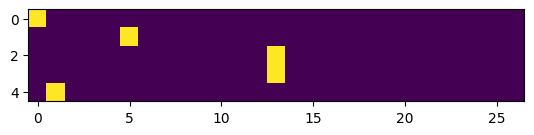

In [18]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape
plt.imshow(xenc)

In [19]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-0.4149,  0.1877, -1.2231,  1.8634, -1.6194,  0.0813, -0.4399,  0.5703,
         -1.0133, -2.9005, -0.6589,  0.5288,  0.7146, -0.2676,  0.9068, -0.5463,
          1.9688,  0.2509, -0.3389, -0.0896,  0.3355,  0.5452, -0.9338,  2.5113,
          0.0386, -1.3947,  0.0529],
        [ 0.5331,  1.8957,  0.6031,  1.5663,  0.7757, -0.5442, -1.0371,  0.0320,
          0.7621, -1.5997, -0.9184,  1.5865, -1.3309,  1.6695,  0.0084,  1.7828,
         -0.2869,  0.2499,  0.2786,  1.5024,  1.6512,  0.4522,  1.6650, -1.4631,
         -2.4793,  1.4750, -0.0209],
        [-0.7579,  1.2971, -0.5038, -1.4934, -0.3139,  0.1661,  1.5199, -1.0235,
         -0.6425,  0.2331,  0.2342,  0.5916,  0.1539, -1.4912,  0.1177,  0.7150,
          0.5080,  0.2538,  0.3218, -0.6415, -0.2717,  0.3314,  1.5682, -0.3320,
          1.7838, -0.3429, -0.8368],
        [-0.7579,  1.2971, -0.5038, -1.4934, -0.3139,  0.1661,  1.5199, -1.0235,
         -0.6425,  0.2331,  0.2342,  0.5916,  0.1539, -1.4912,  0.1177,  0.7150

In [20]:
logits = (xenc @ W)
counts = logits.exp() # equivalent to N

In [21]:
P = counts 
P /= counts.sum(1, keepdim=True)
P
probs = P

In [22]:
P[0].sum()

tensor(1.0000)

In [23]:
P[:, 0].sum()

tensor(0.0824)

In [24]:
probs.shape

torch.Size([5, 27])

In [29]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

def compute_xs_ys():
    xs, ys = [], []
    for w in words:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2 in zip(chs, chs[1:]):
            ix = stoi[ch1]
            iy = stoi[ch2]
            xs.append(ix)
            ys.append(iy)
            
    return torch.tensor(xs), torch.tensor(ys)

xs, ys = compute_xs_ys()


for k in range(100):
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim= True)
    loss = -probs[torch.arange(len(ys)), ys].log().mean() + 0.01*(W**2).mean()
    
    W.grad = None
    loss.backward()
    
    W.data += -50 * W.grad
print(loss.item())
##     Compute loss: Compute: Max Prob Livelihood => Maximum Log Likelihood => Minimum Negative Log Likelyhood 
#     log_likelyhood = 0.0
#     for i in range(len(ys)):
#         y = ys[i]
#         log_likelyhood +=  torch.log(probs[i][y])
# #     print(log_likelyhood) 
#     print('h')
#     nll = -1 * log_likelyhood
#     loss = nll / len(ys)
#     print(loss.item())    
    
#     W.grad = None
#     print('hello')
#     loss.backward()
#     print('bye')
#     W.data += -50 * W.grad


2.490130662918091


In [26]:
loss = -probs[torch.arange(len(ys)), ys].log().mean()

In [27]:
W.grad = None
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [ ]:
W.grad